<a href="https://colab.research.google.com/github/Roumyajit/My-Project-Data-Science/blob/main/Copy_of_E_commerce_Purchase_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

         date  customer_id  product_category payment_method  value [USD]  \
0  20/11/2018        37077               505         credit        49.53   
1  20/11/2018        59173               509         paypal        50.61   
2  20/11/2018        41066               507         credit        85.99   
3  20/11/2018        50741               506         credit        34.60   
4  20/11/2018        53639               515         paypal       266.27   

   time_on_site [Minutes]  clicks_in_site  Unnamed: 7  
0                    12.0               8         NaN  
1                    25.9               8         NaN  
2                    34.9              11         NaN  
3                    16.5               9         NaN  
4                    43.1              30         NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24999 entries, 0 to 24998
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  ----------

<ipython-input-4-2cb3fd564143>:18: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')
/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


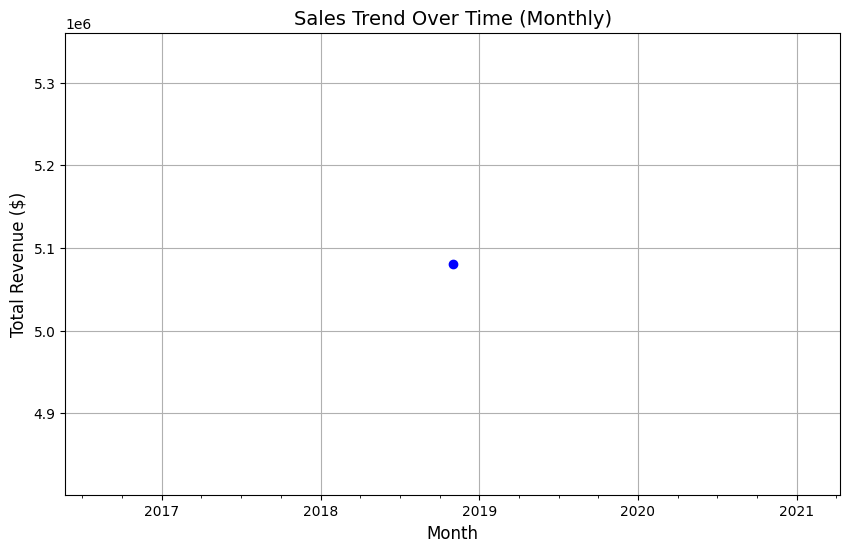

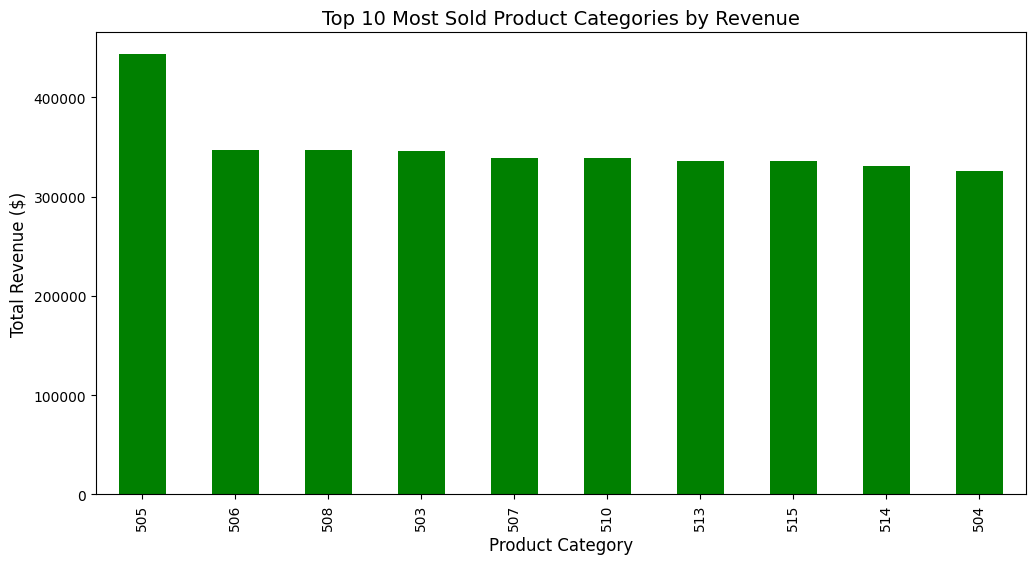

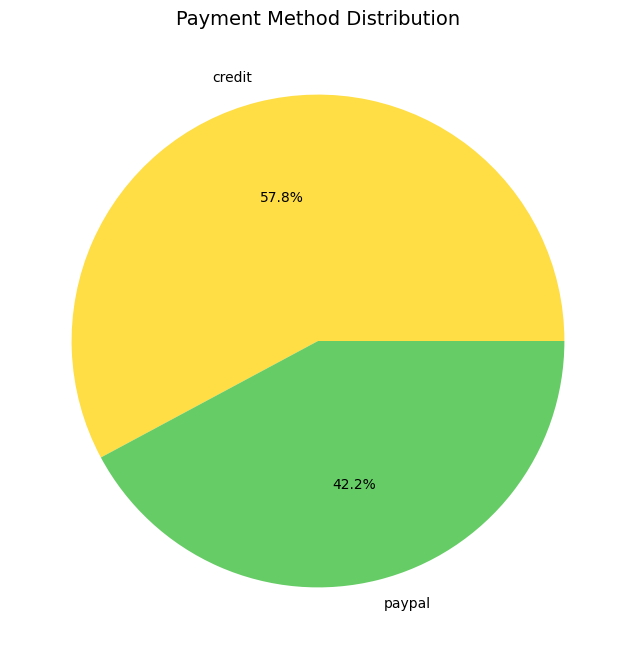

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/purchase_data_exe.csv')

# Display first few rows of the data
print(df.head())

# Data Cleaning: Remove duplicates and handle missing values
df.drop_duplicates(inplace=True)

# Drop rows with missing values in relevant columns: 'value [USD]' and 'date'
df.dropna(subset=['value [USD]', 'date'], inplace=True)

# Ensure 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Data Exploration: Check for basic stats and missing values
print(df.info())
print(df.describe())

# Calculate total revenue
total_revenue = df['value [USD]'].sum()
print(f"Total Revenue: ${total_revenue:,.2f}")

# Count of unique products sold (product_category)
product_sales = df['product_category'].value_counts()
print("Most Sold Products:\n", product_sales.head(10))

# Find the most popular payment method
payment_method_sales = df['payment_method'].value_counts()
print("Payment Methods Distribution:\n", payment_method_sales)

# Average order value (AOV)
aov = df['value [USD]'].mean()
print(f"Average Order Value (AOV): ${aov:,.2f}")

# Customer Lifetime Value (CLV) - calculating for each customer
clv = df.groupby('customer_id')['value [USD]'].sum()
print("Customer Lifetime Value:\n", clv.head(10))

# Trend of sales over time
sales_by_date = df.groupby(df['date'].dt.to_period('M'))['value [USD]'].sum()
print("Sales Trend by Month:\n", sales_by_date)

# Plotting the total revenue over time (monthly)
plt.figure(figsize=(10, 6))
sales_by_date.plot(kind='line', color='blue', marker='o')
plt.title('Sales Trend Over Time (Monthly)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.grid(True)
plt.show()

# Most popular product categories
top_10_products = df.groupby('product_category')['value [USD]'].sum().sort_values(ascending=False).head(10)
top_10_products.plot(kind='bar', figsize=(12,6), color='green')
plt.title('Top 10 Most Sold Product Categories by Revenue', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.show()

# Payment method distribution pie chart
payment_method_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), colors=['#FFDD44', '#66CC66', '#FF3366'])
plt.title('Payment Method Distribution', fontsize=14)
plt.ylabel('')
plt.show()